In [88]:
import pandas as pd
from HelperFunctions.model_performance import *
from HelperFunctions.feature_visualizations import *
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# Load Data

In [79]:
leaderboard = pd.read_html('/Users/janestrada/Desktop/SorelleSummerResearch/TestHarness/test_harness_results/custom_classification_leaderboard.html')[0]
leaderboard = leaderboard.replace('__init__','keras cnn')

In [80]:
models_list = leaderboard['Model Name'].unique()

In [95]:
def get_tptn_results(model_df):
    #get names of rosetta runs
    rosetta_runs = model_df[model_df['Data and Split Description']=='R']
    rosetta_runs_names = list(rosetta_runs['Run ID'].values)

    #get names of R+S runs
    entropy_rosetta_runs = model_df[model_df['Data and Split Description']=='RS']
    entropy_rosetta_runs_names = list(entropy_rosetta_runs['Run ID'].values)

    ### Rosetta Model Test Statistics data extraction

    # "R" Model

    #initialize dataframe that will contain data
    ros_df = pd.DataFrame()
    ros_df['TP Count'] = []
    ros_df['FP Count'] = []
    ros_df['TN Count'] = []
    ros_df['FN Count'] = []

    #initialize empty lists for data
    ros_tp_data = []
    ros_tn_data = []
    ros_fp_data = []
    ros_fn_data = []

    #loop through files
    for run_name in rosetta_runs_names:
        df = pd.read_csv(
            '/Users/janestrada/Desktop/SorelleSummerResearch/TestHarness/test_harness_results/runs/run_%s/testing_data.csv'%run_name)
        tp,tn,fp,fn = get_tptn_data(df)

        #update the lists
        ros_tp_data.append(tp)
        ros_tn_data.append(tn)
        ros_fp_data.append(fp)
        ros_fn_data.append(fn)

    #construct final dataframe
    ros_df['TP Count'] = ros_tp_data
    ros_df['FP Count'] = ros_fp_data
    ros_df['FN Count'] = ros_fn_data
    ros_df['TN Count'] = ros_tn_data

    ros_df.describe()

    ### Rosetta+Entropy Model Test Statistics data extraction

    # "R+S" Model

    #initialize dataframe that will contain data
    spc_df = pd.DataFrame()
    spc_df['TP Count'] = []
    spc_df['FP Count'] = []
    spc_df['TN Count'] = []
    spc_df['FN Count'] = []

    #initialize empty lists for data
    spc_tp_data = []
    spc_tn_data = []
    spc_fp_data = []
    spc_fn_data = []

    #loop through files
    for run_name in entropy_rosetta_runs_names:
        df = pd.read_csv(
            '/Users/janestrada/Desktop/SorelleSummerResearch/TestHarness/test_harness_results/runs/run_%s/testing_data.csv'%run_name)
        tp,tn,fp,fn = get_tptn_data(df)

        #update the lists
        spc_tp_data.append(tp)
        spc_tn_data.append(tn)
        spc_fp_data.append(fp)
        spc_fn_data.append(fn)

    #construct final dataframe
    spc_df['TP Count'] = spc_tp_data
    spc_df['FP Count'] = spc_fp_data
    spc_df['FN Count'] = spc_fn_data
    spc_df['TN Count'] = spc_tn_data

    spc_df.describe()

    results = spc_df.describe() - ros_df.describe()
    return results

In [110]:
#define metrics to be looked at
clf_scores_names = [
                'Accuracy','Balanced Accuracy','AUC Score',
                'Average Precision','F1 Score','Precision',
                'Recall']

#iterate through each model
tptn_data = []
metric_data = []

for i in range(len(models_list)):
    print(f"\t {model.upper()}")
    #specify which model we're looking at
    model = models_list[i]
    model_df = leaderboard[leaderboard['Model Name']==model]
    
    #get tptn data
    results = get_tptn_results(model_df)
    for i in results.iloc[1,:].values:
        tptn_data.append(i) 

    
    #get metrics data
    for metric in clf_scores_names:
        spc_df = model_df[model_df['Data and Split Description']=="RS"][metric]
        ros_df = model_df[model_df['Data and Split Description']=="R"][metric]
        
        delta_metric = spc_df.describe() - ros_df.describe()
        print(f"**∆{metric}-->{delta_metric.iloc[1]}**")
        metric_data.append(delta_metric.iloc[1])
    print("")

	 GMM_CLASSIFICATION
**∆Accuracy-->0.0**
**∆Balanced Accuracy-->0.0009999999999998899**
**∆AUC Score-->0.0030000000000000027**
**∆Average Precision-->0.002000000000000113**
**∆F1 Score-->0.0010000000000000009**
**∆Precision-->-0.0040000000000000036**
**∆Recall-->0.0020000000000000573**

	 SVM_CLASSIFICATION
**∆Accuracy-->0.0018333333333334645**
**∆Balanced Accuracy-->-0.0029166666666667895**
**∆AUC Score-->-0.0003333333333332966**
**∆Average Precision-->-0.0008333333333332416**
**∆F1 Score-->-0.00016666666666675933**
**∆Precision-->0.005750000000000033**
**∆Recall-->-0.009750000000000147**

	 RANDOM_FOREST_CLASSIFICATION
**∆Accuracy-->0.018166666666666775**
**∆Balanced Accuracy-->0.003666666666666485**
**∆AUC Score-->-0.0006666666666665932**
**∆Average Precision-->-0.0040000000000000036**
**∆F1 Score-->0.01633333333333331**
**∆Precision-->0.02150000000000002**
**∆Recall-->-0.016666666666666607**

	 KERAS CNN
**∆Accuracy-->0.001000000000000112**
**∆Balanced Accuracy-->0.0020000000000000

In [86]:
names = models_list
full_names = ["SVM","Random Forest CLF","Keras CNN","GradBoost CLF","k-NN CLF","Naive Bayes CLF","DecisionTree","GaussMix CLF"]

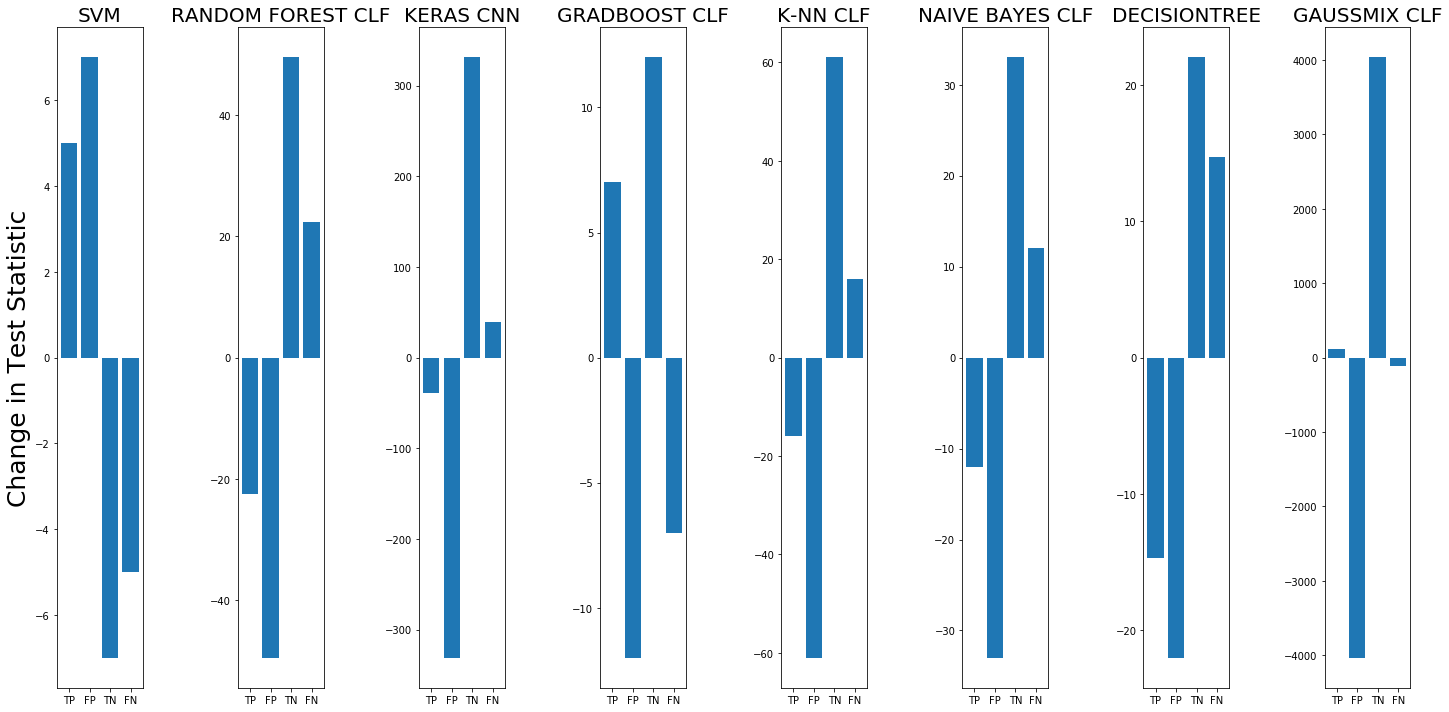

In [105]:
f, ax = plt.subplots(nrows=1,ncols=len(names),figsize=(20,10))

for i in range(len(names)):
    ax[i].bar(x=['TP','FP','TN','FN'],height=data[i*4:4*(i+1)])
    ax[i].set_title(f"{full_names[i].upper()}",fontsize="20")
    
ax[0].set_ylabel("Change in Test Statistic",fontsize="25")
plt.tight_layout()

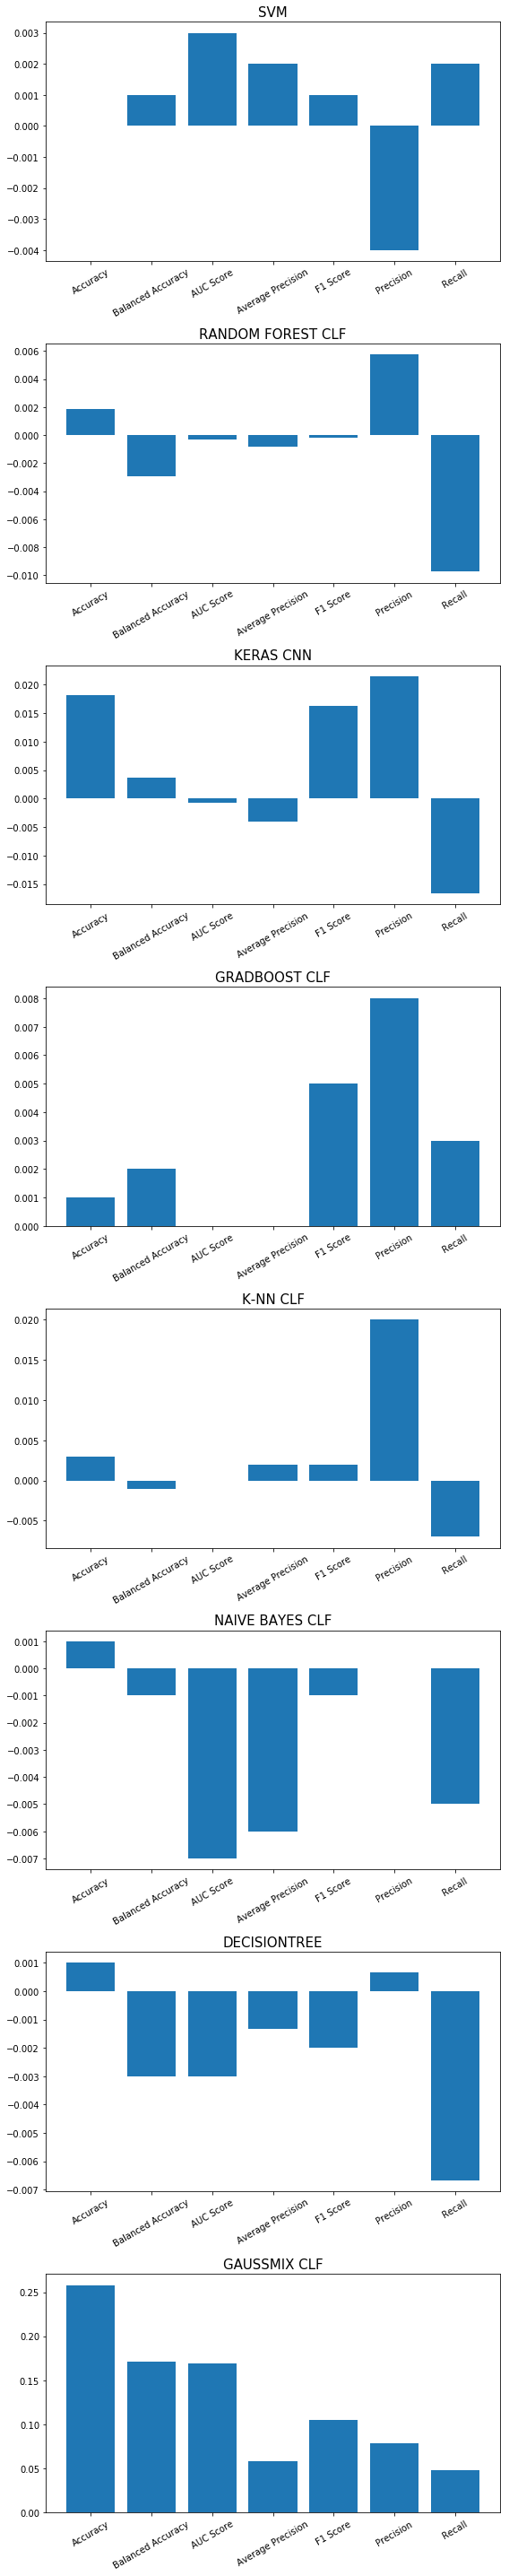

In [132]:
f, ax = plt.subplots(ncols=1,nrows=len(names),figsize=(8,40))

for i in range(len(names)):
    ax[i].bar(x=clf_scores_names,height=metric_data[i*7:7*(i+1)])
    ax[i].set_title(f"{full_names[i].upper()}",fontsize="15")
    ax[i].set_xticklabels(labels=clf_scores_names,rotation=30)
    
#ax[0].set_ylabel("Change in Test Statistic",fontsize="25")
plt.tight_layout()

In [89]:
leaderboard

,Run ID,Date,Time,Model Name,Model Author,Num Classes,Accuracy,Balanced Accuracy,AUC Score,Average Precision,...,Samples In Train,Samples In Test,Model Description,Column Predicted,Num Features Used,Data and Split Description,Normalized,Num Features Normalized,Feature Extraction,Was Untested Data Predicted
0,a36DEZaEW8AN6,2019-07-21,11:35:36,svm_classification,Jan,2.0,0.894,0.683,0.892,0.653,...,64205,16052,"Support Vector Classifier, sklearn default params",stabilityscore_cnn_calibrated_2classes,130,RS,True,130,False,False
1,aE36QabdoWEb,2019-07-20,14:48:58,random_forest_classification,Hamed,2.0,0.873,0.795,0.905,0.652,...,64205,16052,"Random Forest: n_estimators=361, max_features=...",stabilityscore_cnn_calibrated_2classes,113,R,True,113,False,False
2,6Dq8kzvr2rDZ3,2019-07-21,12:21:00,svm_classification,Jan,2.0,0.894,0.682,0.889,0.651,...,64205,16052,"Support Vector Classifier, sklearn default params",stabilityscore_cnn_calibrated_2classes,113,R,True,113,False,False
3,EQ7LzVddk3g6Y,2019-06-06,22:51:36,random_forest_classification,Hamed,NaN,0.873,0.795,0.904,0.651,...,64205,16052,"Random Forest: n_estimators=361, max_features=...",stabilityscore_cnn_calibrated_2classes,113,R,True,113,shap_audit,False
4,6DbPAo9lEvJxN,2019-07-20,13:55:19,random_forest_classification,Hamed,2.0,0.874,0.791,0.904,0.651,...,64205,16052,"Random Forest: n_estimators=361, max_features=...",stabilityscore_cnn_calibrated_2classes,130,RS,True,130,False,False
5,Ev6x7bLQxd61y,2019-06-06,20:14:54,random_forest_classification,Hamed,NaN,0.874,0.791,0.904,0.651,...,64205,16052,"Random Forest: n_estimators=361, max_features=...",stabilityscore_cnn_calibrated_2classes,130,RS,True,130,shap_audit,False
6,5MRvGMggllqdr,2019-07-20,15:59:16,random_forest_classification,Hamed,2.0,0.872,0.794,0.904,0.651,...,64205,16052,"Random Forest: n_estimators=361, max_features=...",stabilityscore_cnn_calibrated_2classes,113,R,True,113,False,False
7,Q6ByxbEgEWmoP,2019-06-06,14:42:27,random_forest_classification,Hamed,NaN,0.875,0.793,0.904,0.651,...,64205,16052,"Random Forest: n_estimators=361, max_features=...",stabilityscore_cnn_calibrated_2classes,130,RS,True,130,shap_audit,False
8,aLP2YGrYjA17m,2019-07-20,15:53:40,random_forest_classification,Hamed,2.0,0.875,0.792,0.904,0.649,...,64205,16052,"Random Forest: n_estimators=361, max_features=...",stabilityscore_cnn_calibrated_2classes,130,RS,True,130,False,False
9,52G83wzom3RR2,2019-07-20,17:41:18,keras cnn,Hamed,2.0,0.781,0.817,0.901,0.640,...,64205,16052,"Keras: 2 hidden layers (64 and 55 nodes), weig...",stabilityscore_cnn_calibrated_2classes,113,R,True,113,False,False
